# Statystyka w Analizie Danych

## Laboratorium 5 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab05.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.

**UWAGA: Wykorzystaj gotową implementację kNN [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**

In [18]:
# <<< TUTAJ WYKONAJ ZADANIE >>>
# <UZUPEŁNIJ>
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
    
train = pd.DataFrame(train).drop(columns=[1])
test = pd.DataFrame(test).drop(columns=[1])



In [19]:
columns_string = """
1. Class,
2. Specimen Number,
3. Eccentricity,
4. Aspect Ratio,
5. Elongation,
6. Solidity,
7. Stochastic Convexity,
8. Isoperimetric Factor,
9. Maximal Indentation Depth,
10. Lobedness,
11. Average Intensity,
12. Average Contrast,
13. Smoothness,
14. Third moment,
15. Uniformity,
16. Entropy
"""

columns_string = ''.join([i for i in columns_string
                          if not i.isdigit() and
                          not i == '\n' and
                          not i == '.'])
columns_string = columns_string.split(',')
columns_string.remove(columns_string[1])
result = []
for c in columns_string:
   result.append(c.lower().lstrip().rstrip())
result

['class',
 'eccentricity',
 'aspect ratio',
 'elongation',
 'solidity',
 'stochastic convexity',
 'isoperimetric factor',
 'maximal indentation depth',
 'lobedness',
 'average intensity',
 'average contrast',
 'smoothness',
 'third moment',
 'uniformity',
 'entropy']

In [20]:
train.columns = result
test.columns = result

In [21]:
test.describe()

,class,eccentricity,aspect ratio,elongation,solidity,stochastic convexity,isoperimetric factor,maximal indentation depth,lobedness,average intensity,average contrast,smoothness,third moment,uniformity,entropy
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,17.904412,0.713613,2.308071,0.521687,0.899597,0.938746,0.518407,0.036752,0.478845,0.051467,0.124291,0.017484,0.005856,0.000395,1.179112
std,11.329759,0.224480,2.236218,0.196694,0.144816,0.143053,0.223256,0.036031,0.853495,0.035254,0.051878,0.013403,0.005302,0.000436,0.574607
min,1.000000,0.057390,0.727601,0.094070,0.363936,0.405025,0.044056,-0.002376,-0.069865,-0.000919,0.021498,-0.001122,-0.000392,-0.000032,0.085703
25%,8.000000,0.547471,1.217674,0.359407,0.841107,0.882733,0.326654,0.010477,0.024621,0.022845,0.081900,0.006949,0.002155,0.000101,0.739347
50%,14.000000,0.761831,1.585417,0.520467,0.925156,0.967052,0.569796,0.022569,0.098118,0.043278,0.117550,0.014273,0.004286,0.000231,1.069875
75%,28.000000,0.897303,2.210619,0.653339,0.998260,1.037821,0.695880,0.049418,0.424421,0.074505,0.163227,0.025702,0.007971,0.000505,1.602196
max,36.000000,1.096470,15.318850,1.006415,1.121180,1.139580,0.913034,0.157804,4.331030,0.154303,0.281071,0.067945,0.030656,0.002394,2.856340


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
ficzery = [
            'eccentricity',
            'aspect ratio',
            'elongation',
            'smoothness',
            'isoperimetric factor',
            'maximal indentation depth',
            'average intensity',
            'average contrast',
            'third moment',
            'entropy',
           ]
klasy = [4, 5, 9, 10, 12]

new_train = train[train['class'].isin(klasy)]
new_test = test[test['class'].isin(klasy)]

x = new_train[ficzery]
y = new_train['class']

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x, y)

prediction = knn.predict(new_test[ficzery])


Accuracy: 0.65
Balanced accuracy: 0.6353797865662273
F1 score: 0.65


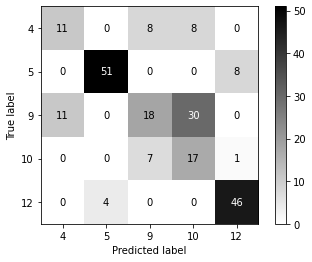

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score

def show_statistics(true, pred):
    cm = confusion_matrix(true, pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=klasy)
    cmd.plot(cmap='binary')
    print('Accuracy:', accuracy_score(true, pred))
    bac = balanced_accuracy_score(true, pred)
    print('Balanced accuracy:', bac)
    f1s = f1_score(true, pred, average='micro')
    print('F1 score:', f1s)

    return bac, f1s

b, f1 = show_statistics(prediction, new_test['class'])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_train = scaler.fit_transform(train.drop(columns=['class']))
normalized_test = scaler.fit_transform(test.drop(columns=['class']))


In [26]:
normalized_train = np.column_stack((train['class'], normalized_train))
normalized_test = np.column_stack((test['class'], normalized_test))

In [27]:
normalized_train = pd.DataFrame(normalized_train, columns=result)
normalized_test = pd.DataFrame(normalized_test, columns=result)

In [28]:
normalized_test.describe()

,class,eccentricity,aspect ratio,elongation,solidity,stochastic convexity,isoperimetric factor,maximal indentation depth,lobedness,average intensity,average contrast,smoothness,third moment,uniformity,entropy
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,17.904412,0.631542,0.108316,0.468701,0.707383,0.726591,0.545872,0.244278,0.124681,0.337491,0.396009,0.269385,0.201218,0.175968,0.394642
std,11.329759,0.216037,0.153257,0.215592,0.191241,0.194748,0.256918,0.224938,0.193937,0.227122,0.199858,0.194058,0.170766,0.179814,0.207392
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.471649,0.033587,0.290829,0.630142,0.650337,0.325207,0.080243,0.021470,0.153100,0.232697,0.116856,0.082027,0.054780,0.235918
50%,14.000000,0.677946,0.058790,0.467364,0.741136,0.765126,0.605010,0.155733,0.038170,0.284736,0.370039,0.222889,0.150668,0.108330,0.355215
75%,28.000000,0.808323,0.101637,0.613001,0.837674,0.861469,0.750103,0.323349,0.112315,0.485910,0.546008,0.388376,0.269347,0.221331,0.547345
max,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
normalized_train.describe()

,class,eccentricity,aspect ratio,elongation,solidity,stochastic convexity,isoperimetric factor,maximal indentation depth,lobedness,average intensity,average contrast,smoothness,third moment,uniformity,entropy
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000
mean,18.970588,0.644786,0.100870,0.472156,0.706796,0.780537,0.580504,0.196969,0.085786,0.266014,0.394216,0.249502,0.247201,0.141733,0.402678
std,10.989479,0.198860,0.152243,0.208113,0.179091,0.151642,0.239842,0.197882,0.155550,0.184222,0.193326,0.182946,0.198834,0.141634,0.218212
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.485824,0.031495,0.312276,0.626768,0.716935,0.427531,0.062317,0.014756,0.122236,0.248107,0.111076,0.100091,0.048045,0.229016
50%,22.000000,0.681225,0.051244,0.462750,0.732011,0.806926,0.622893,0.129719,0.025427,0.222594,0.370472,0.195888,0.189059,0.093326,0.378689
75%,29.000000,0.807086,0.093001,0.605923,0.825019,0.877642,0.762897,0.240313,0.065968,0.372414,0.537309,0.366487,0.341277,0.190119,0.552970
max,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
ficzery = [
            'eccentricity',
            'aspect ratio',
            'elongation',
            'smoothness',
            'isoperimetric factor',
            'maximal indentation depth',
            'average intensity',
            'average contrast',
            'third moment',
            'entropy',
           ]
klasy = [4, 5, 9, 10, 12]

new_normalized_train = normalized_train[normalized_train['class'].isin(klasy)]
new_normalized_test = normalized_test[normalized_test['class'].isin(klasy)]

x = new_normalized_train[ficzery]
y = new_normalized_train['class']

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x, y)

prediction = knn.predict(new_normalized_test[ficzery])


Accuracy: 0.759090909090909
Balanced accuracy: 0.754551295780681
F1 score: 0.759090909090909


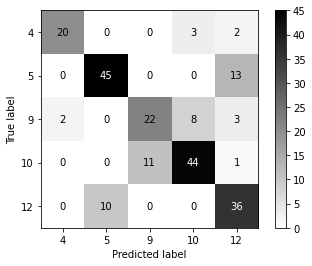

In [31]:
nb, nf1 = show_statistics(prediction, new_normalized_test['class'])

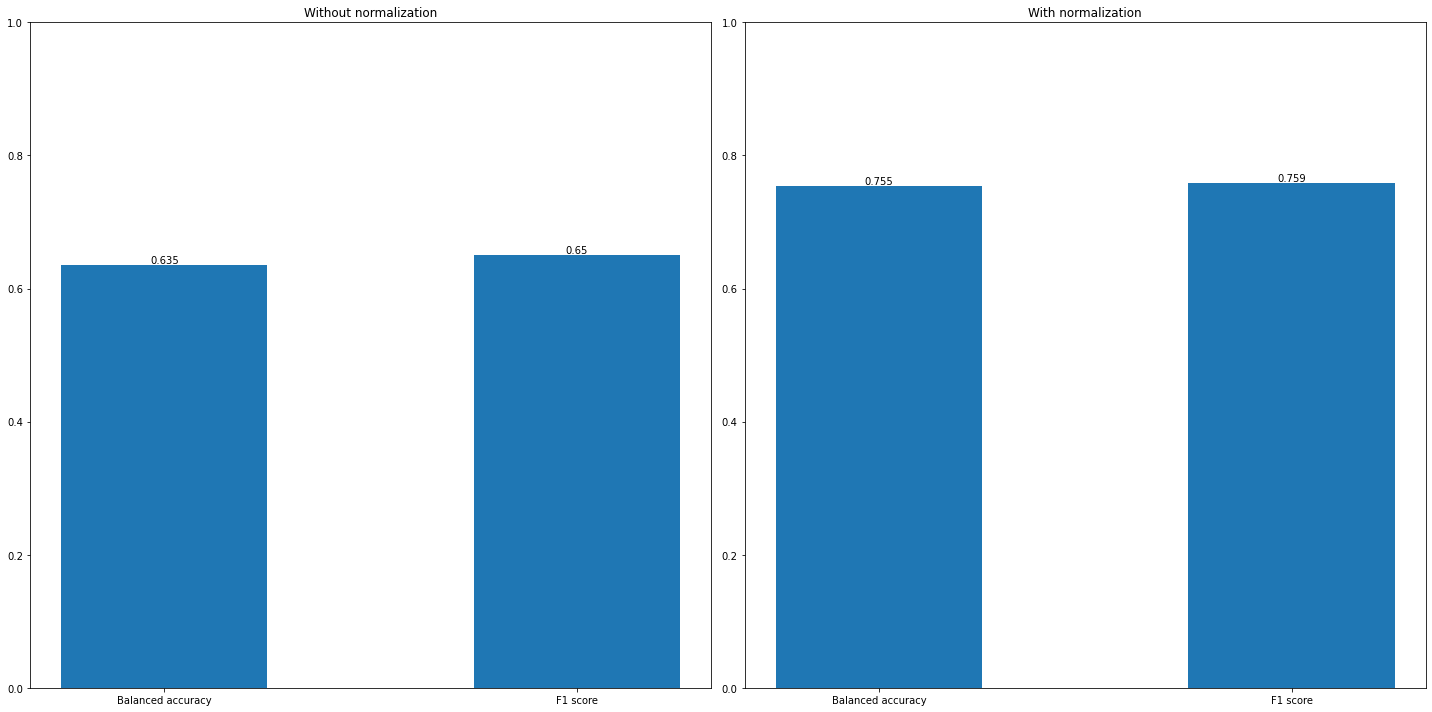

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))


bars0 = ax[0].bar(['Balanced accuracy', 'F1 score'], [b, f1], width=0.5)
ax[0].bar_label(bars0, (round(b, 3), round(f1, 3)))
bars1= ax[1].bar(['Balanced accuracy', 'F1 score'], [nb, nf1], width=0.5)
ax[1].bar_label(bars1, (round(nb, 3), round(nf1, 3)))

ax[0].set_ylim((0, 1))
ax[0].set_title('Without normalization')
ax[1].set_ylim((0, 1))
ax[1].set_title('With normalization')

plt.tight_layout()

#### Selekcja cech
Na tym samym podzbiorze danych (co w poprzednim zadaniu).
* Przeprowadź selekcję cech (wybierz {2, 5} cech) za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera) lub istniejących implementacji z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji dla różnej liczby cech:
    * 10 cech bez normalizacji (wyniki z poprzedniego zadania),
    * 10 cech z normalizacją (wyniki z poprzedniego zadania),
    * 5 wybranych cech z bez normalizacji,
    * 5 wybranych cech z normalizacją,
    * 2 wybranych cech z bez normalizacji,
    * 2 wybranych cech z normalizacją.
* Opisz wyniki i napisz wnioski.


In [35]:
# <<< TUTAJ WYKONAJ ZADANIE >>>
from sklearn.feature_selection import SelectKBest


def select_features(data, k):
    selector = SelectKBest(k=k)
    selector.fit(data.drop(columns=['class']), data['class'])
    return selector.get_feature_names_out()


select_features(train, 5)

array(['eccentricity', 'aspect ratio', 'elongation',
       'isoperimetric factor', 'maximal indentation depth'], dtype=object)